Abhinav Malik

## Research question/interests

Briefly describe your research question or interests here.

**What is the relationship between body mass index (BMI) and smoking status and their impact on an individual's medical expenses in the United States?**

I plan on analyzing the impact of body mass index (BMI) and smoking status on medical expenses in the US using the Medical Cost Personal Datasets from Kaggle. The analysis will involve cleaning and pre-processing the data, exploring the relationship between the variables using descriptive statistics and data visualization, running regression models to quantify the relationship, and performing subgroup analysis to identify demographic differences. The findings will shed light on the importance of prevention and early intervention in reducing healthcare costs associated with obesity and smoking.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('../data/raw/Medical_Cost.csv')
plt.style.use('ggplot')
sns.set_style('darkgrid')

## Basic/General EDA
Here I am doing some basic EDA just to give a glimpse of my dataframe

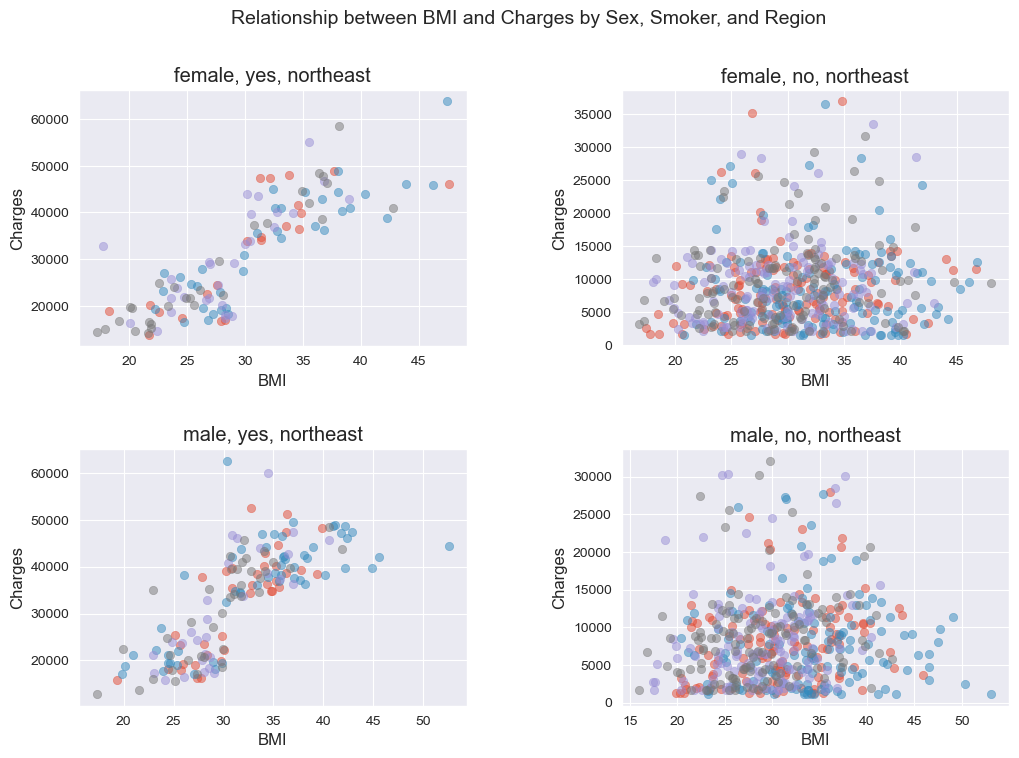

In [26]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
sexes = dataframe["sex"].unique()
smokers = dataframe["smoker"].unique()
regions = dataframe["region"].unique()

for i, sex in enumerate(sexes):
    for j, smoker in enumerate(smokers):
        for k, region in enumerate(regions):
            subset = dataframe[(dataframe["sex"] == sex) & (dataframe["smoker"] == smoker) & (dataframe["region"] == region)]
            axs[i*2+j].scatter(subset["bmi"], subset["charges"], alpha=0.5)
            axs[i*2+j].set_title(f"{sex}, {smoker}, {region}")
            axs[i*2+j].set_xlabel("BMI")
            axs[i*2+j].set_ylabel("Charges")

fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.suptitle("Relationship between BMI and Charges by Sex, Smoker, and Region", fontsize=14)
plt.show()


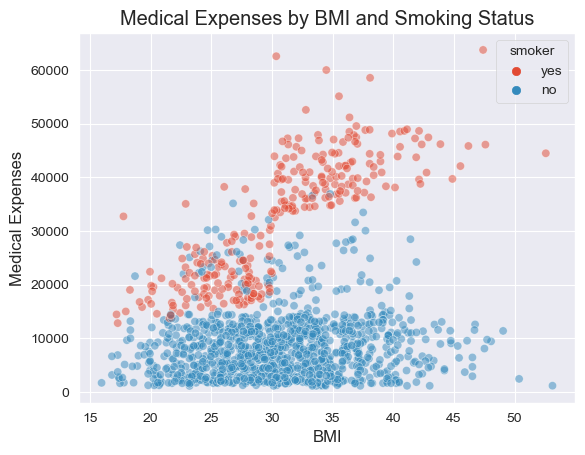

In [27]:
sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='smoker', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Medical Expenses')
plt.title('Medical Expenses by BMI and Smoking Status')
plt.show()

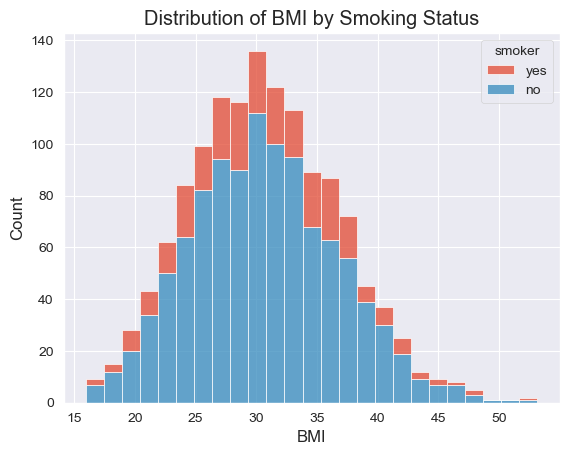

In [28]:
sns.histplot(data=dataframe, x='bmi', hue='smoker', multiple='stack')
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

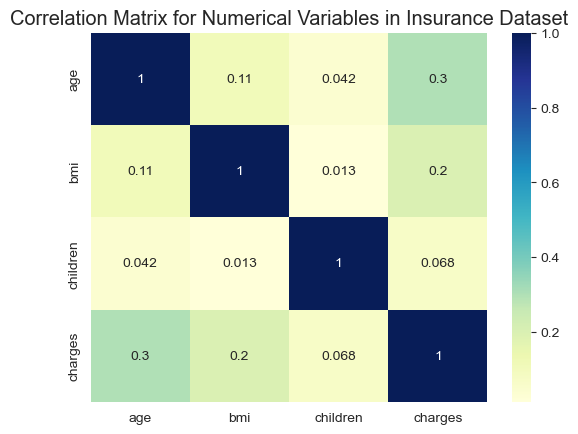

In [29]:
numerical_cols = ["age", "bmi", "children", "charges"]
corr_matrix = dataframe[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix for Numerical Variables in Insurance Dataset")
plt.show()

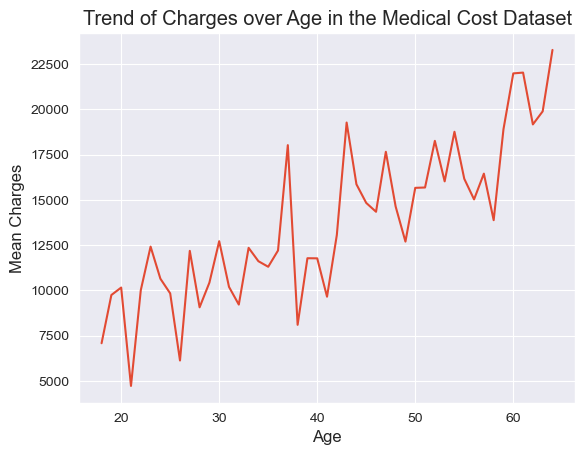

In [30]:
age_grouped = dataframe.groupby("age")["charges"].mean()

plt.plot(age_grouped.index, age_grouped.values)

plt.xlabel("Age")
plt.ylabel("Mean Charges")
plt.title("Trend of Charges over Age in the Medical Cost Dataset")
plt.show()

# Cleaning Data
Here I am going to clean the data like removing any duplicates or removing any nan values.The code will also tell how many duplicates there were if there were any.

In [11]:
print(f"Number of duplicates: {dataframe.duplicated().sum()}")
dataframe.drop_duplicates(inplace=True)

Number of duplicates: 1


In [13]:
print(f"Number of missing values:\n{dataframe.isnull().sum()}")
dataframe.dropna(inplace=True)

Number of missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Checking for Outliers

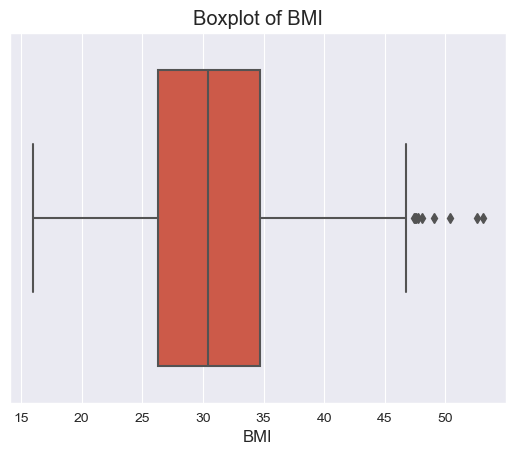

In [14]:
sns.boxplot(data=dataframe, x='bmi')
plt.xlabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

q1 = dataframe['bmi'].quantile(0.25)
q3 = dataframe['bmi'].quantile(0.75)
iqr = q3 - q1
dataframe = dataframe[(dataframe['bmi'] > q1 - 1.5 * iqr) & (dataframe['bmi'] < q3 + 1.5 * iqr)]


## Processing Data

In [15]:
bins = [0, 18.5, 25, 30, 100]
labels = ['underweight', 'normal', 'overweight', 'obese']
dataframe['bmi_category'] = pd.cut(dataframe['bmi'], bins=bins, labels=labels)


In [9]:
dataframe['smoker'] = dataframe['smoker'].map({'no': 0, 'yes': 1})

In [12]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60+']
dataframe['age_group'] = pd.cut(dataframe['age'], bins=bins, labels=labels)


In [13]:
dataframe.to_csv("procesed_medicalCost_AbhinavMalik.csv", index=False)

## Method Chaining 

In [26]:
import pandas as pd

def load_and_process(url_or_path_to_csv_file):
    
    # Load data and drop unused columns
    df = (
        pd.read_csv(url_or_path_to_csv_file)
        .drop(['region'], axis=1)
    )
    
    # Clean data
    df = (
        df
        .dropna()
        .reset_index(drop=True)
    )
    
    # Process data
    df = (
        df
        .assign(is_smoker=df['smoker'].map({'yes': True, 'no': False}))
        .drop(['smoker'], axis=1)
        .assign(age_group=pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '18-35', '35-50', '50-65', '65+']))
    )
    
    # Restructure data format
    df = (
        df
        .melt(id_vars=['age', 'sex', 'bmi', 'is_smoker', 'age_group'], var_name='variable', value_name='value')
    )
    
    return df


In [14]:
#load_and_process('../data/raw/Medical_Cost.csv')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def insurance_eda(dataframe):
    # Relationship between BMI and Charges by Sex, Smoker, and Region
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()
    sexes = dataframe["sex"].unique()
    smokers = dataframe["smoker"].unique()
    regions = dataframe["region"].unique()

    for i, sex in enumerate(sexes):
        for j, smoker in enumerate(smokers):
            for k, region in enumerate(regions):
                subset = dataframe[(dataframe["sex"] == sex) & (dataframe["smoker"] == smoker) & (dataframe["region"] == region)]
                sns.scatterplot(x="bmi", y="charges", hue="smoker", data=subset, ax=axs[i*2+j], alpha=0.5)
                axs[i*2+j].set_title(f"{sex}, {smoker}, {region}")
                axs[i*2+j].set_xlabel("BMI")
                axs[i*2+j].set_ylabel("Charges")

    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.suptitle("Relationship between BMI and Charges by Sex, Smoker, and Region", fontsize=14)
    plt.show()

    # Medical Expenses by BMI and Smoking Status
    sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='smoker', alpha=0.5)
    plt.xlabel('BMI')
    plt.ylabel('Medical Expenses')
    plt.title('Medical Expenses by BMI and Smoking Status')
    plt.show()

    # Distribution of BMI by Smoking Status
    sns.histplot(data=dataframe, x='bmi', hue='smoker', multiple='stack')
    plt.title('Distribution of BMI by Smoking Status')
    plt.xlabel('BMI')
    plt.ylabel('Count')
    plt.show()

    # Correlation Matrix for Numerical Variables in Insurance Dataset
    numerical_cols = ["age", "bmi", "children", "charges"]
    corr_matrix = dataframe[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix for Numerical Variables in Insurance Dataset")
    plt.show()

    # Trend of Charges over Age in the Medical Cost Dataset
    age_grouped = dataframe.groupby("age")["charges"].mean()
    plt.plot(age_grouped.index, age_grouped.values)
    plt.xlabel("Age")
    plt.ylabel("Mean Charges")
    plt.title("Trend of Charges over Age in the Medical Cost Dataset")
    plt.show()


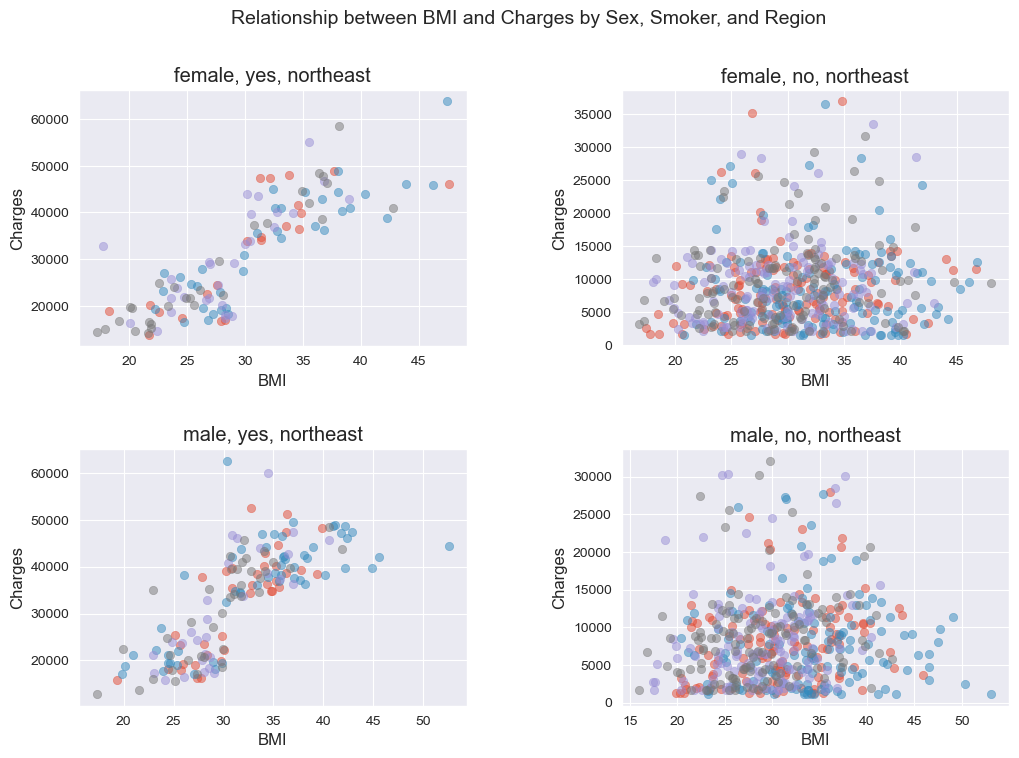

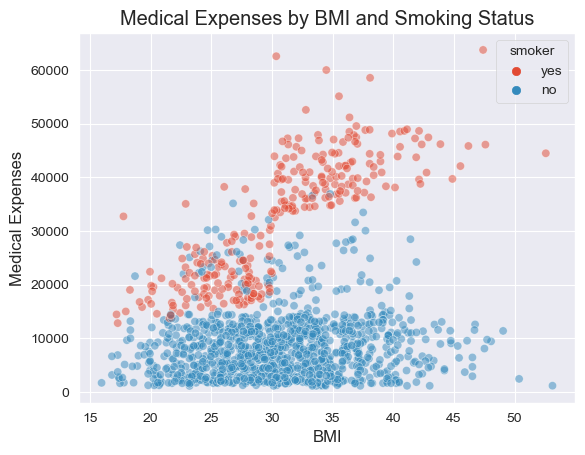

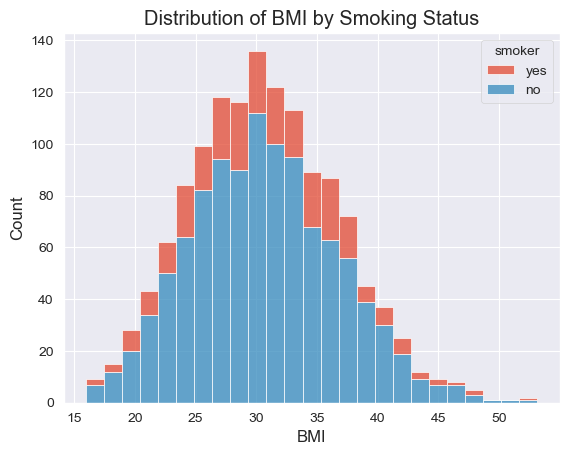

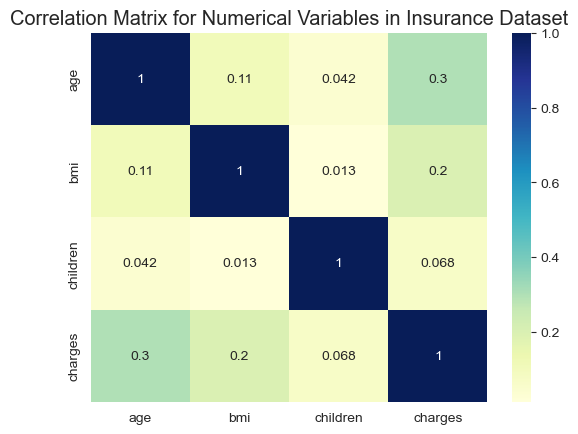

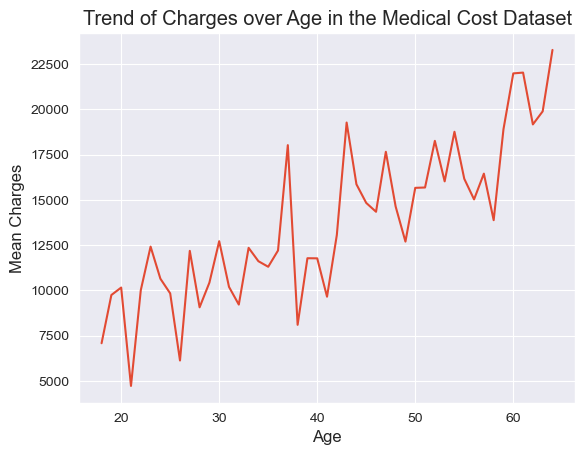

In [33]:
generate_eda(dataframe)